### Predicting Credit card approval of an individual

###### Introduction:

We are working on a credit card dataset, in which we have information on the individuals such as gender, car owner, property owner, children, etc. This dataset contains 19 columns and 1548 rows. There are 9 numerical variables,2 continuous variables and 8 categorical variables. Based on these factors we need to predict each individual's credit card approvals and check missing values, outliers present or not. We have to deal with this messy data to predict the outcome.

**1.Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?**

A.This proposal is very important because approving credit to the right people who have good creditworthiness is very important. Before approving the loans, banks need to know whether they are capable of repaying the loan amount or not. Predicting a good client is essential then they would be able to get back their credit in a specified time along with good interests. So, banks are getting profits through the rotation of money with less risk.

**2.How is it going to impact the banking sector?**

A.This proposal impacts the banking sector so they would be able to choose the right people who can repay the loan sincerely. Banks can easily give credit cards to those with good creditworthiness which leads to better risk management.


**3.If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.**

A.The gap in the knowledge is that we need to add one more feature: the CIBIL score which is very important for predicting the approvals. Bankers check the CIBIL score to approve the loans. Most of the applications get rejected due to fewer CIBIL scores. However, the proposed method can be adapted and applied to banks to evaluate good creditworthiness based on some individual factors leading to better risk management and profitability.

In [315]:
import warnings
warnings.filterwarnings('ignore')

In [316]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [317]:
#Reading files using pandas
df1=pd.read_csv("/Users/pc/Desktop/Dataset/Credit_card.csv")
df2=pd.read_csv("/Users/pc/Desktop/Dataset/Credit_card_label.csv")
df1.head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3


**EDA:**

In [318]:
#mergeing two datasets
df3=df1.merge(df2,how='outer')
df3.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [319]:
#To get information of a dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [320]:
#To check the dimensions of a dataset
df3.shape

(1548, 19)

**observation:**
The dataset contains 1548 rows and 19 columns in which ind id, children, employed days,mobile_phone,work_phone, phone, email id, family members, and label columns are discrete variables. Annual income and birth count are continuous variables. Gender, car owner, property owner, type of income, marital status, education, housing type, and type of occupation are categorical variables.

In [321]:
df3.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1543    False
1544    False
1545    False
1546    False
1547    False
Length: 1548, dtype: bool

In [322]:
#To check the null values
df3.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

**Observation:**
This dataset contains null values.Gender column contains 7 nullvalues,Annual_income contains 23,birthday_count contains 22 and type_occupation contains 488 nullvalues.

In [323]:
df3["Ind_ID"].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1543    False
1544    False
1545    False
1546    False
1547    False
Name: Ind_ID, Length: 1548, dtype: bool

In [324]:
df3["Ind_ID"].nunique()

1548

**Observation:** No duplicated values in ind_id column.

In [325]:
#To check statistical values
df3.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


**In this dataset, there are some unnecessary columns for prediction such as children, marital status, work phone, phone, and email id.**

In [326]:
#Removing uncessary columns
df3.drop(["CHILDREN","Marital_status","Work_Phone","Phone","EMAIL_ID","Family_Members"],axis=1,inplace=True)
df3.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,Type_Occupation,label
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,House / apartment,-18772.0,365243,1,NaN,1
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,NaN,1
2,5009746,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,NaN,-586,1,NaN,1
3,5009749,F,Y,N,NaN,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,NaN,1
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,NaN,1


**Dealing with missing values**

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

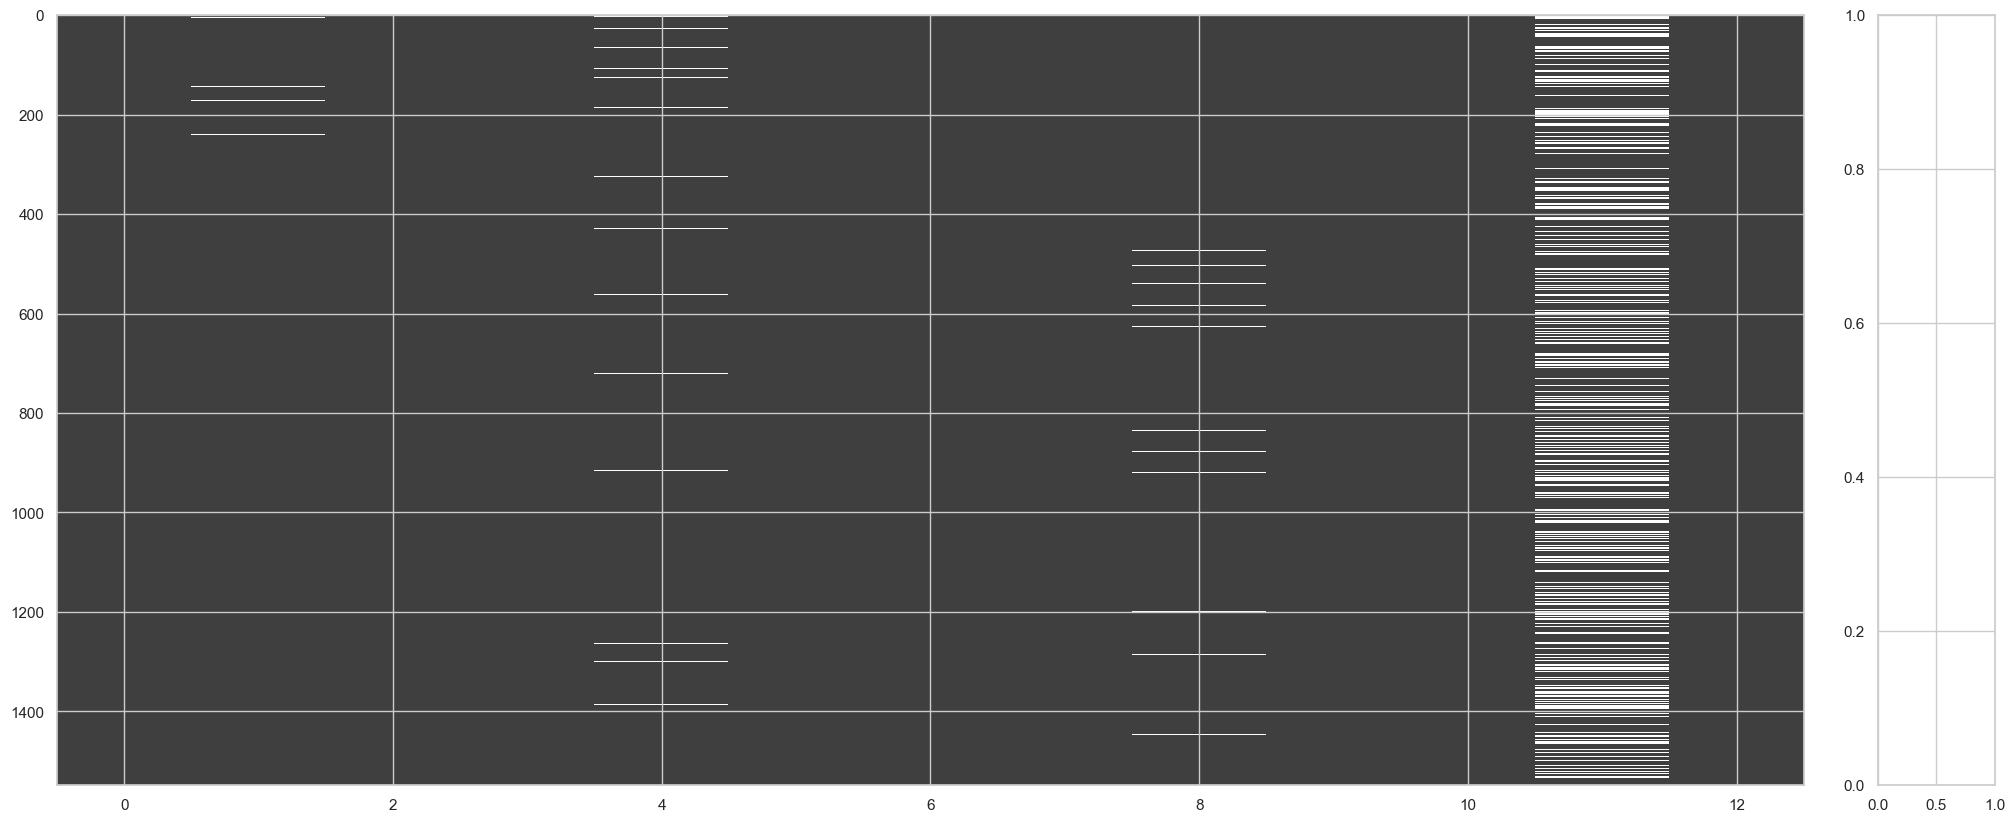

In [328]:
#Checking relation between missingness
import missingno as msno
msno.matrix(df3)

**OBSERVATION:**
There is relation between missingness in the variables.Hence,it is MCAR.

In [ ]:
#create bar graph for missing values
msno.bar(df3.sample(1548))

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True)

**Obervation:** Birth count and employed days have a negative linear relationship means if birth count increases, employed days decrease.

In [ ]:
df3["Type_Occupation"].isnull().sum()

In [ ]:
print("percent of missing values in type_occupation:")
percent= (df3["Type_Occupation"].isnull().sum()/df3.shape[0])*100
print(round(percent,2))

**Observation:** column type_occupation contains 31% null values. As per my knowledge, it is a very high amount of null values and this column is not very important for analysis.so I want to drop this column.

In [ ]:
#dropping type occupation column
df3.drop(["Type_Occupation"],axis=1,inplace=True)
df3.head()

In [ ]:
#checking null values in gender column
df3["GENDER"].isnull().sum()

**Observation:**

GENDER is a categorical column containing 7 null values only.



In [ ]:
df3.isnull().sum()

In [ ]:
#plotting histogram for Annual income
sns.histplot(data=df3,x="Annual_income",bins=20,kde=True,color="red")
plt.axvline(x=df3.Annual_income.mean(),color='green',alpha=0.5,label='Mean') # adding vertical line as mean
plt.axvline(x=df3.Annual_income.median(),c='green',ls='--',alpha=0.5,label='Median') # adding vertical line as median
plt.title("Annual income")
plt.legend() # adding legend

In [ ]:
#plotting boxplot to check the outliers and distribution
sns.boxplot(data=df3,x="Annual_income")

**OBSERVATION:** Annul_income contains outliers.so need to perform log transform

In [ ]:
#performing log transformation to annual income
df3["Annual_income_log"]=np.log(df3["Annual_income"])

In [ ]:
#plotting boxplot to see the distribution of Annual income log
sns.boxplot(data=df3,x="Annual_income_log")

In [ ]:
#creating histogram to see the districbution of the birthday count variable
sns.histplot(data=df3,x="Birthday_count",bins=10,kde=True,color="red")
plt.axvline(x=df3.Birthday_count.mean(),color='green',alpha=0.5,label='Mean') # adding vertical line as mean
plt.axvline(x=df3.Birthday_count.median(),c='green',ls='--',alpha=0.5,label='Median') # adding vertical line as median
plt.title("Birthday_count")
plt.legend() # adding legend

**Observation:**

As per the graph, the Annual income column is right-skewed.The number of people with highest Birthday count is between -12500 to -10000 and lowest count is between -10000 to -7500.

In [ ]:
#checking correlation between variables
df3.corr()

In [ ]:
#plotting heatmap to check the relation between the variables
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True)

**Obervation:**
Birth count and employed days have a negative linear relationship means if birth count increases, employed days decrease.

In [ ]:
print(df3["GENDER"].value_counts())
sns.countplot(data=df3, x="GENDER", hue="label")
plt.title("Comparing the gender ratio in approval category")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

**Observation:**
Females are applying for credit cards more than males. Female applications are approved more than male applications.

In [ ]:
#cheking column names
df3.columns

In [ ]:
print(df3["label"].value_counts())
sns.catplot(data=df3, x="Car_Owner",y="label",hue="GENDER", kind="bar")

**Observation:** Males own cars more than females. Males without cars got more rejections. Females with cars and without cars got an equal number of rejections and approvals.

In [ ]:
print(df3["label"].value_counts())
sns.catplot(data=df3, x="Propert_Owner",y="label",hue="GENDER", kind="bar")


**Observation:**
Males with no property are higher than females in the dataset.

In [ ]:
#importing plotly express sub module
import plotly.express as px
print(df3["GENDER"].value_counts())
#plotting histogram for annual_income of genders
fig = px.histogram(df3,x = 'Annual_income',
                   color = 'GENDER',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Annual_income  over genders')
fig.update_layout(bargap=0.1)
fig.show()

**Observation:** The female count is higher than the male and the female count of annual income is also very high.

In [ ]:
#plotting bar graph genders with their education
print(df3["EDUCATION"].unique())
sns.countplot(data=df3, x="GENDER", hue="EDUCATION")
plt.title("Comparing the gender ratio in EDUCATION category")
plt.xlabel("GENDER")
plt.ylabel("Count")
plt.show()

**Observation:** Females are educated more than males.

In [ ]:
#plotting credit card approved over type income
fig = px.histogram(df3,
                  x = "label",
                  marginal = 'box', 
                   color="Type_Income",
                  title = "Creditcard approved over type Income ")
fig.update_layout(bargap=0.2)
fig.show()

**Observation:** Working professionals got more approvals and state servants got less number of approvals.

 **Encoding categorical varibles into numerical variables:**

In [ ]:
df3.columns

In [ ]:
df3.info()

In [ ]:
#to get the unique values of gender column
df3["GENDER"].unique()

In [ ]:
#to get the unique values of car owner column
df3["Car_Owner"].unique()

In [ ]:
##to get the unique values of property owner column
df3["Propert_Owner"].unique()

In [ ]:
#to get the unique values of type of income column
df3["Type_Income"].unique()

In [ ]:
#to get the unique values of education column
df3["EDUCATION"].unique()

In [ ]:
#performing ordinal encoding using map fuction
df3['GENDER'] = df3.GENDER.map({'M': 0, 'F':1})

df3['Car_Owner'] = df3.Car_Owner.map({'Y': 0, 'N':1})

df3['Propert_Owner'] = df3.Propert_Owner.map({'Y': 0, 'N':1})
df3['Type_Income'] = df3.Type_Income.map({"Pensioner":0,"Commercial associate":1,"Working":2,"State servant":3})
df3['EDUCATION'] = df3.EDUCATION.map({'Higher education':0, 'Secondary / secondary special':1,
       'Lower secondary':2, 'Incomplete higher':3, 'Academic degree':4})
df3['Housing_type'] = df3.Housing_type.map({'House / apartment':0, 'With parents':1, 'Rented apartment':2,
       'Municipal apartment':3, 'Co-op apartment':4, 'Office apartment':5})

In [ ]:
df3.head()

**Imputing null values:**

Imputing knn values:

In [ ]:
from sklearn.impute import KNNImputer
df3_knn = df3.copy(deep=True)
imputer = KNNImputer(n_neighbors=2)
df3_knn.iloc[:,:]=imputer.fit_transform(df3_knn)

In [ ]:
df3_knn.isnull().sum()

**After applying data_knn imputation we have cleaned data.No missing values.**

**Getting independent features in dataset(X) and dependent feature in series(y)**

In [ ]:
x=df3_knn.drop(["label"],axis=1)
print(x.head())
y=df3_knn["label"]
y.head()

**Feature selection and model bulding**

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

**OBSERVATION:** Based on the P-value "Ind_ID", "Car_Owner", "Propert_Owner", "Annual_income", "EDUCATION", "Mobile_phone", "Annual_income_log" are not necessary. we can remove the variables whose p-value is greater than 0.05.

In [ ]:
#dropping unnessary columns
x=df3_knn.drop(["Ind_ID", "Car_Owner", "Propert_Owner","Annual_income","EDUCATION","Mobile_phone","Annual_income_log"], axis = 1)
x.head()

**Splitting data into Training and Test data**

In [ ]:
x = df3_knn[["GENDER","Type_Income","Housing_type","Birthday_count","Employed_days"]]
y = df3.label

In [ ]:
x.head()

In [ ]:
from sklearn.model_selection import train_test_split # importing train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) #20% is test and 80% is training

In [ ]:
### both will have same shape
x_train.shape, y_train.shape

In [ ]:
## both will have same shape
x_test.shape, y_test.shape

**Standardisation/ feature scaling the dataset
Feature scaling Perform to create same scale for all variables.**

**Hence, all variables will have similar influnece on the model**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_train


In [ ]:
x_test=ss.fit_transform(x_test)
x_test

**The problem statement is classification.so here we have to use classification ML models.**

**LOGISTIC REGRESSION:**

In [ ]:
#Create a Logistic regression
from sklearn import linear_model
logr=linear_model.LogisticRegression()
#Train the model using the training sets
logr.fit(x_train,y_train)
#Predict the response for test dataset
logr_pred=logr.predict(x_test)
logr_pred

In [ ]:
#importing metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_mat=confusion_matrix(y_test, logr_pred)   #create object for confusion matrix
print("confusion matrix:")
print(confusion_mat)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, logr_pred), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, logr_pred), 2))
print("Recall score",round(recall_score(y_test, logr_pred), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,logr_pred), 2))              #f1_score using f1_score metric

**LOG LOSS:**

In [ ]:
#checking log loss on test data
from sklearn.metrics import log_loss     #importing log loss
logloss = log_loss(y_test, logr.predict_proba(x_test)) #creating object for log loss
logloss

**Applying different classification ML models to get the high accuracy:**

In [ ]:
#importing libraries for random forest,knn classifier,support vector classifier and decision tree.
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  


**DECISION TREE:**

In [ ]:
#Create a Decision tree Classifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
#Train the model using the training sets
classifier.fit(x_train, y_train)  
#Predict the response for test dataset
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
print("confusion matrix:",cm)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, y_pred), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred), 2))
print("Recall score",round(recall_score(y_test, y_pred), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred), 2))              #f1_score using f1_score metric

**RANDOM FOREST CLASSIFIER:**

In [ ]:
#Create a Random forest Classifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy") 
#Train the model using the training sets
classifier.fit(x_train, y_train) 
#Predict the response for test dataset
y_pred1= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred1)
print("confusion matrix:")
print(cm)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, y_pred1), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred1), 2))
print("Recall score",round(recall_score(y_test, y_pred1), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred1), 2))   



**KNC MODEL:**

In [ ]:
#Create a KNN Classifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
#Train the model using the training sets
classifier.fit(x_train, y_train) 
#Predict the response for test dataset
y_pred2= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred2)
print("confusion matrix:")
print(cm)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, y_pred2), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred2), 2))
print("Recall score",round(recall_score(y_test, y_pred2), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred2), 2))   


**SVC MODEL:**

In [ ]:
#Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred3 = clf.predict(x_test)
cm= confusion_matrix(y_test, y_pred3)
print("confusion matrix:")
print(cm)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, y_pred3), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred3), 2))
print("Recall score",round(recall_score(y_test, y_pred3), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred3), 2))   


In [ ]:
models = [linear_model.LogisticRegression(),RandomForestClassifier(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]
  
for i in range(5):
    models[i].fit(x_train, y_train)
  
    print(f'{models[i]} : ')
    pred_train = models[i].predict(x_train)
    print('Accuracy for train data: ', round(accuracy_score(y_train,pred_train ),2))
  
    pred_val = models[i].predict(x_test)
    print('Accuracy for test data: ', round(accuracy_score(y_test, pred_val),2))
    print()

**Observation:We can say SVC and logistic regression models have high accuracy among all the models.**

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred3)
auc

**Plotting AUC for SVC model**

In [ ]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred3)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
data.head()